In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import time

In [2]:
def cria_sq(sq_size):
    #square = np.empty((0, 2),int)  # Inicializa um array vazio para armazenar as coordenadas (x, y)
    square = [(0,0)]
    
    for coord_x in range(1, sq_size+1):
        for coord_y in range(1, sq_size+1):
            square = np.append(square, [[coord_x, coord_y]], axis=0)
    return square

In [3]:
def razao_Area(interacao,limite_maior,limite_menor):
    x = np.random.randint(1,limite_maior+1,interacao)
    y = np.random.randint(1,limite_maior+1,interacao)
    dentro_quadrado = np.sum((x <= limite_menor) & (y <= limite_menor))
    return dentro_quadrado/interacao

In [4]:
t1 = time.time()
sq_maior = cria_sq(100)
sq_menor = cria_sq(80)
interacao = 10000

print(f"A razão entre os dois quadrados pelo método de Monte Carlo com {interacao} interações foi de {razao_Area(interacao,sq_maior[-1][0],sq_menor[-1][0])}")
t2 = time.time()

print(f"O tempo gasto pra executar o programa foi de {t2 - t1}segundos")

A razão entre os dois quadrados pelo método de Monte Carlo com 10000 interações foi de 0.6382
O tempo gasto pra executar o programa foi de 0.13944363594055176segundos


In [15]:
import numpy as np

total_result = np.empty(0)  # Inicializa um array vazio

for i in range(100):
    resultado = razao_Area(interacao, sq_maior[-1][0], sq_menor[-1][0])
    total_result = np.append(total_result, resultado)

print(total_result)

[0.6459 0.6446 0.6358 0.6473 0.6416 0.6451 0.6386 0.6394 0.6425 0.6374
 0.6333 0.6357 0.6323 0.6448 0.6373 0.639  0.6404 0.6429 0.6358 0.6338
 0.644  0.642  0.6436 0.6468 0.6382 0.6337 0.6419 0.639  0.6373 0.6406
 0.6403 0.6442 0.6435 0.6372 0.6344 0.635  0.6372 0.6382 0.6388 0.6411
 0.6348 0.6439 0.6437 0.6459 0.6348 0.6435 0.6386 0.6402 0.6362 0.6483
 0.6379 0.633  0.6369 0.6454 0.6366 0.6412 0.6415 0.652  0.633  0.636
 0.6378 0.6428 0.6299 0.6439 0.6448 0.6284 0.6422 0.6462 0.6371 0.639
 0.6392 0.6459 0.6386 0.6337 0.6363 0.6496 0.6475 0.6341 0.6424 0.6372
 0.6476 0.638  0.6366 0.636  0.6503 0.6368 0.6435 0.6413 0.6453 0.6419
 0.6409 0.6355 0.6388 0.6402 0.6427 0.647  0.6424 0.644  0.6452 0.6419]


In [6]:
# Calculando a média e o desvio padrão
media = np.mean(dados)
desvio_padrao = np.std(dados)

print("Média:", media)
print("Desvio Padrão:", desvio_padrao)


Média: 0.6400305900000001
Desvio Padrão: 0.004764380049061998


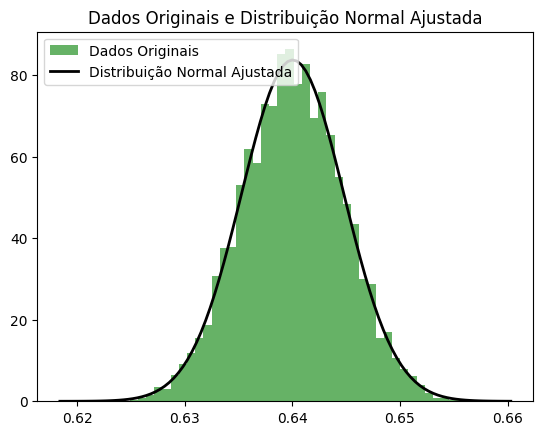

In [8]:
# Gerando dados de uma distribuição normal com a mesma média e desvio padrão
dados_normais = np.random.normal(media, desvio_padrao, 1000)

# Plotando os dados originais e a distribuição normal ajustada
plt.hist(dados, bins=50, density=True, alpha=0.6, color='g', label='Dados Originais')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, media, desvio_padrao)
plt.plot(x, p, 'k', linewidth=2, label='Distribuição Normal Ajustada')
plt.legend()
plt.title('Dados Originais e Distribuição Normal Ajustada')
plt.show()


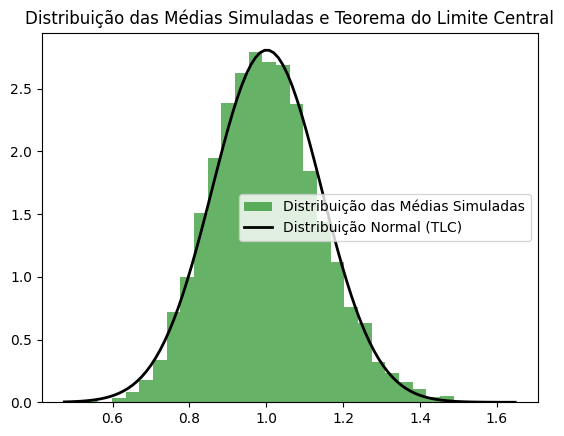

In [16]:
# Função para realizar a simulação de Monte Carlo
def monte_carlo_simulation(num_simulations, sample_size):
    means = []
    for _ in range(num_simulations):
        sample = np.random.chisquare(df=1, size=sample_size)  # Amostra de uma distribuição uniforme
        means.append(np.mean(sample))
    return means

# Configurações da simulação
num_simulations = 10000
sample_size = 100

# Realiza a simulação
simulated_means = monte_carlo_simulation(num_simulations, sample_size)

# Plota os resultados
plt.hist(simulated_means, bins=30, density=True, alpha=0.6, color='g', label='Distribuição das Médias Simuladas')

# Plota a distribuição normal esperada (TLC)
mu = np.mean(simulated_means)
sigma = np.std(simulated_means)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = (1 / (np.sqrt(2 * np.pi) * sigma)) * np.exp(-0.5 * ((x - mu) / sigma) ** 2)
plt.plot(x, p, 'k', linewidth=2, label='Distribuição Normal (TLC)')

plt.title('Distribuição das Médias Simuladas e Teorema do Limite Central')
plt.legend()
plt.show()
